In [1]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from utilities import *
from scipy import sparse
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import normalize,scale, StandardScaler

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Q1

In [115]:
x, y = load_data()
x_tfidf = TFxIDF(x)

print("trn shape", x_tfidf.shape)

trn shape (7882, 27768)


## Q2

In [3]:
y_pred = kmean_wrapper(x_tfidf, y)
evaluate_results(y, y_pred)

-----------------Running default-------------------
Homogeneity: 0.752
Completeness: 0.755
V-measure: 0.754
Adjusted Rand-Index: 0.832
Adjusted Mutual info score: 0.752


## Q3

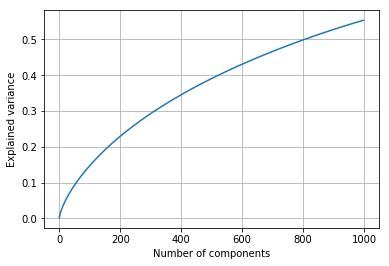

In [13]:
svd = TruncatedSVD(n_components=1000, n_iter=7, random_state=42)
svd.fit(x_tfidf)

explained_var = np.cumsum(svd.explained_variance_)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(explained_var)
ax.set_xticklabels(np.arange(-200, 1200, 200))
ax.set_yticklabels(np.arange(-1, 6, 1)/10)
ax.set_xlabel('Number of components')
ax.set_ylabel('Explained variance')
ax.grid('on')
plt.savefig('3-a', dpi=300)

### (b)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
fitting completed
-----------------Running best_r: 50-------------------
Homogeneity: 0.754
Completeness: 0.756
V-measure: 0.755
Adjusted Rand-Index: 0.837
Adjusted Mutual info score: 0.754


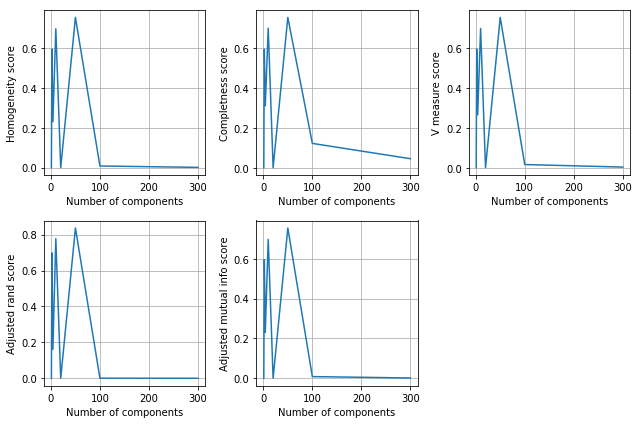

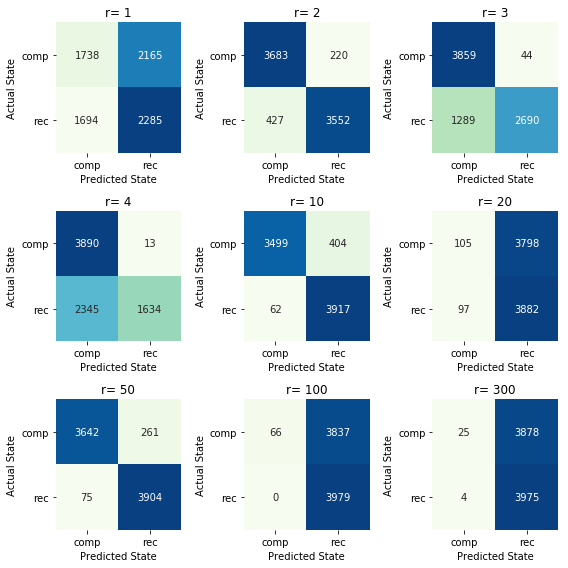

In [116]:
rs = [1, 2, 3, 4, 10, 20, 50, 100, 300]
rs_wrapper(rs, x_tfidf, y, method='svd', n_clusters=2, if_reassign=True,
           plot_5measures=True, five_measure_name='3-b-svd-5-measures',
           plot_cont=True, cont_name='3-b-svd-cont-matrix', label=['comp', 'rec'],
          five_measure_size=(9, 6), cont_size=(8, 8), x_rotation=0)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
fitting completed
-----------------Running best_r: 2-------------------
Homogeneity: 0.677
Completeness: 0.678
V-measure: 0.678
Adjusted Rand-Index: 0.775
Adjusted Mutual info score: 0.677


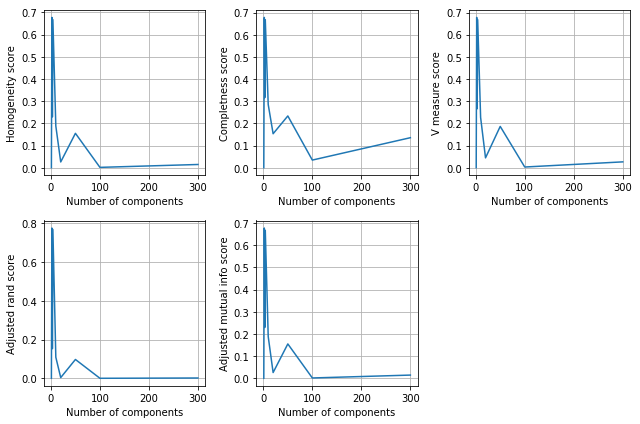

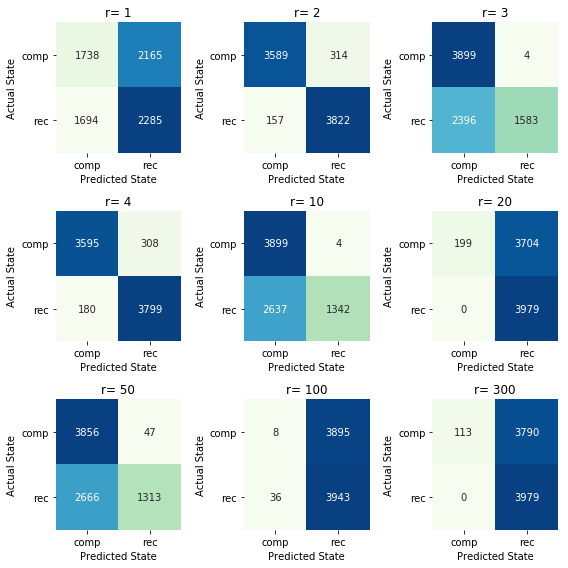

In [117]:
rs_wrapper(rs, x_tfidf, y, method='nmf', n_clusters=2, if_reassign=True,
           plot_5measures=True, five_measure_name='3-b-nmf-5-measures',
           plot_cont=True, cont_name='3-b-nmf-cont-matrix', label=['comp', 'rec'],
          five_measure_size=(9, 6), cont_size=(8, 8), x_rotation=0)

## Q4

-----------------Running default-------------------
Homogeneity: 0.754
Completeness: 0.756
V-measure: 0.755
Adjusted Rand-Index: 0.837
Adjusted Mutual info score: 0.754


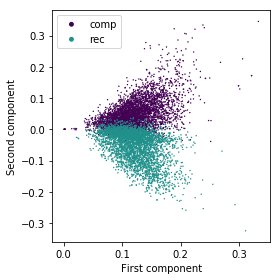

In [102]:
svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
x_reduced = svd.fit_transform(x_tfidf)
y_pred = kmean_wrapper(x_reduced, y)
evaluate_results(y, y_pred)

plot_color_coding(x_reduced, y, ['comp', 'rec'], '4-a', figsize=(4, 4))

-----------------Running default-------------------
Homogeneity: 0.005
Completeness: 0.012
V-measure: 0.007
Adjusted Rand-Index: 0.001
Adjusted Mutual info score: 0.005


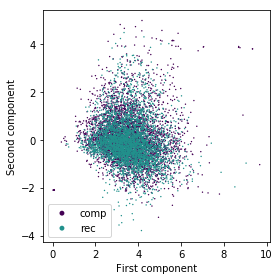

In [103]:
x_unit_var_reduced = scale(x_reduced, with_mean=False)
y_pred = kmean_wrapper(x_unit_var_reduced, y)
evaluate_results(y, y_pred)

plot_color_coding(x_unit_var_reduced, y, ['comp', 'rec'], '4-b-unit-var', figsize=(4, 4))

-----------------Running with log transform-------------------
Homogeneity: 0.676
Completeness: 0.678
V-measure: 0.677
Adjusted Rand-Index: 0.773
Adjusted Mutual info score: 0.676


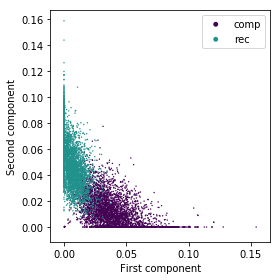

In [106]:
nmf = NMF(n_components=2, random_state=42)
x_reduced = nmf.fit_transform(x_tfidf)
x_log_reduced = np.log1p(x_reduced)

y_pred = kmean_wrapper(x_log_reduced, y)
evaluate_results(y, y_pred, 'with log transform')

plot_color_coding(x_log_reduced, y, ['comp', 'rec'], '4-b-log', figsize=(4, 4))

-----------------Running log transform -> normalize-------------------
Homogeneity: 0.684
Completeness: 0.686
V-measure: 0.685
Adjusted Rand-Index: 0.774
Adjusted Mutual info score: 0.683
-----------------Running normalize -> log transform-------------------
Homogeneity: 0.688
Completeness: 0.690
V-measure: 0.689
Adjusted Rand-Index: 0.778
Adjusted Mutual info score: 0.687


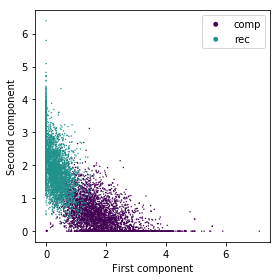

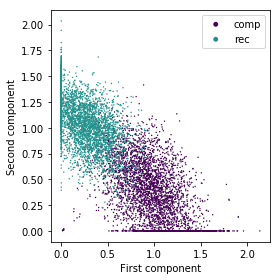

In [49]:
x_log_reduced = np.log1p(x_reduced)
x_log_unit_var_reduced = scale(x_log_reduced, with_mean=False)
y_pred = kmean_wrapper(x_log_unit_var_reduced, y)
evaluate_results(y, y_pred, 'log transform -> normalize')
x_unit_var_reduced = scale(x_reduced, with_mean=False)
x_unit_var_log_reduced = np.log1p(x_unit_var_reduced)
y_pred = kmean_wrapper(x_unit_var_log_reduced, y)
evaluate_results(y, y_pred, 'normalize -> log transform')

plot_color_coding(x_log_unit_var_reduced, y, ['comp', 'rec'], '4-b-log-unit-var', figsize=(4, 4))
plot_color_coding(x_unit_var_log_reduced, y, ['comp', 'rec'], '4-b-unit-var-log', figsize=(4, 4))

## Q5

In [118]:
x, y, labels = load_data_all()
x_tfidf = TFxIDF(x)

print("trn shape", x_tfidf.shape)

trn shape (18846, 52295)


In [67]:
y_pred = kmean_wrapper(x_tfidf, y, n_clusters=20, if_reassign=False)
evaluate_results(y, y_pred, '20 class')

-----------------Running 20 class-------------------
Homogeneity: 0.291
Completeness: 0.352
V-measure: 0.318
Adjusted Rand-Index: 0.107
Adjusted Mutual info score: 0.288


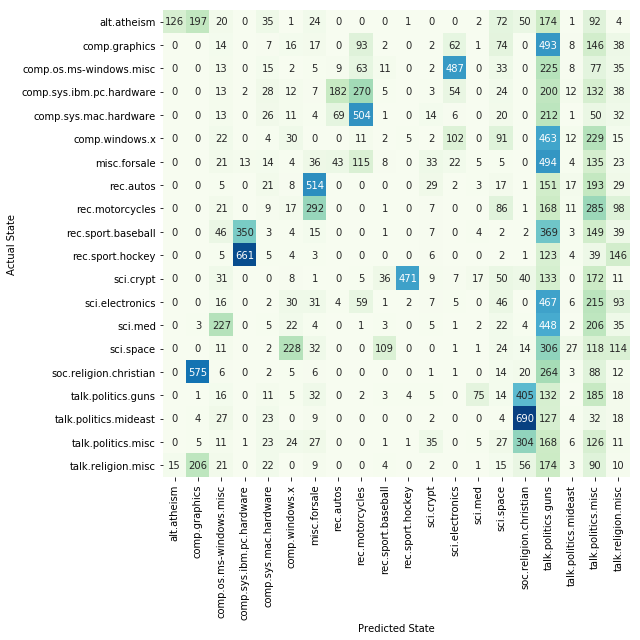

In [68]:
cont_matrix = metrics.confusion_matrix(y, y_pred)
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax = sns.heatmap(cont_matrix, cmap='GnBu', cbar=False, annot=True, fmt='d')
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)
ax.set_xlabel('Predicted State')
ax.set_ylabel('Actual State')

fig.tight_layout()
fig.savefig('5-no-reassign', dpi=300)

In [120]:
y_pred = kmean_wrapper(x_tfidf, y, n_clusters=20, if_reassign=True)
evaluate_results(y, y_pred, '20 class')

-----------------Running 20 class-------------------
Homogeneity: 0.291
Completeness: 0.352
V-measure: 0.318
Adjusted Rand-Index: 0.107
Adjusted Mutual info score: 0.288


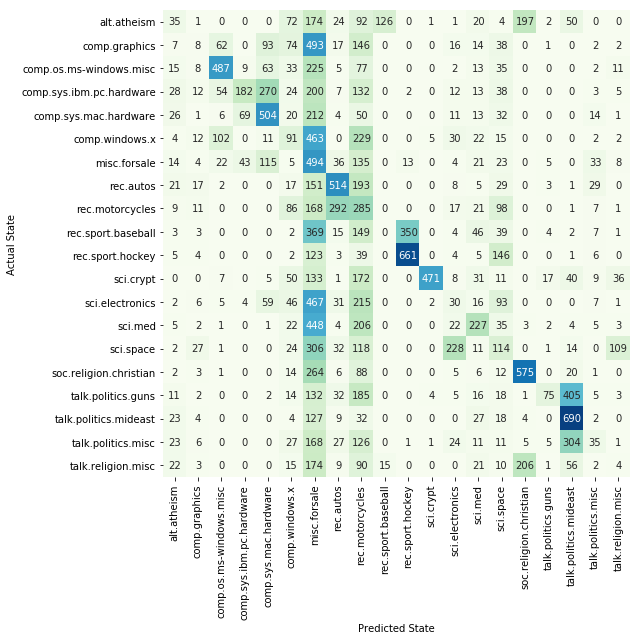

In [121]:
cont_matrix = metrics.confusion_matrix(y, y_pred)
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
ax = sns.heatmap(cont_matrix, cmap='GnBu', cbar=False, annot=True, fmt='d')
ax.set_xticklabels(labels, rotation=90)
ax.set_yticklabels(labels, rotation=0)
ax.set_xlabel('Predicted State')
ax.set_ylabel('Actual State')

fig.tight_layout()
fig.savefig('5-reassign', dpi=300)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
fitting completed
-----------------Running best_r: 10-------------------
Homogeneity: 0.334
Completeness: 0.376
V-measure: 0.354
Adjusted Rand-Index: 0.129
Adjusted Mutual info score: 0.332


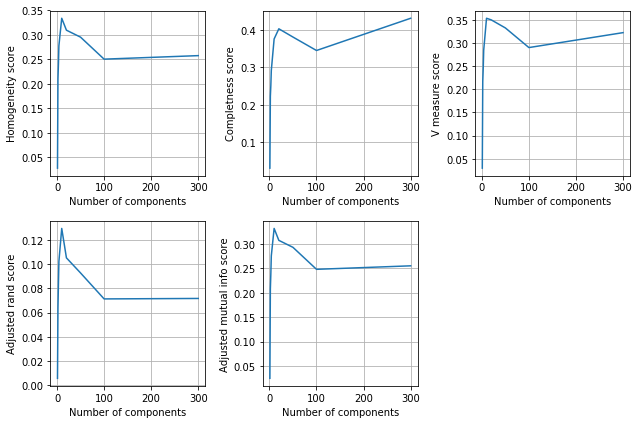

In [122]:
rs_wrapper(rs, x_tfidf, y, method='svd', n_clusters=20, if_reassign=False,
           plot_5measures=True, five_measure_name='5-svd-5-measures',
           plot_cont=False, cont_name='5-svd-cont-matrix', label=labels,
           five_measure_size=(9, 6), cont_size=(8, 8), x_rotation=0)

iter  0
iter  1
iter  2
iter  3
iter  4
iter  5
iter  6
iter  7
iter  8
fitting completed
-----------------Running best_r: 10-------------------
Homogeneity: 0.321
Completeness: 0.356
V-measure: 0.337
Adjusted Rand-Index: 0.128
Adjusted Mutual info score: 0.319


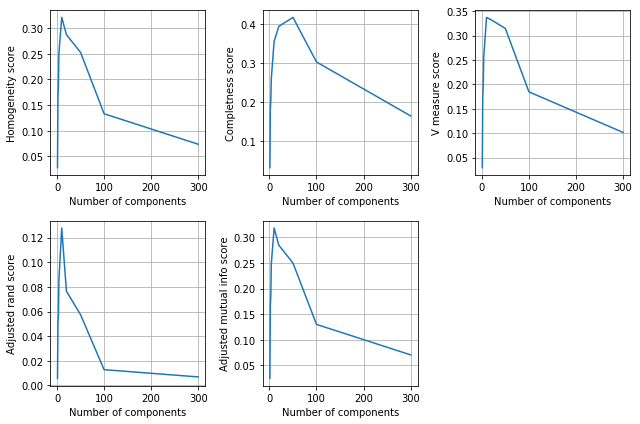

In [123]:
rs_wrapper(rs, x_tfidf, y, method='nmf', n_clusters=20, if_reassign=False,
           plot_5measures=True, five_measure_name='5-nmf-5-measures',
           plot_cont=False, cont_name='5-nmf-cont-matrix', label=labels,
           five_measure_size=(9, 6), cont_size=(8, 8), x_rotation=0)

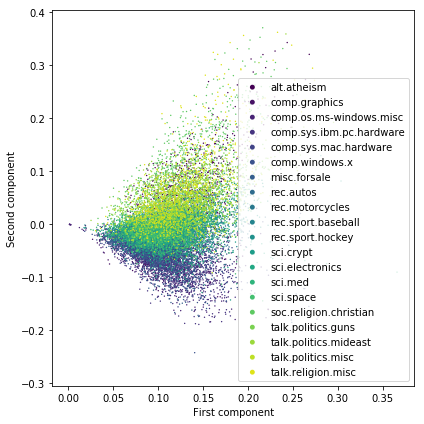

In [108]:
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
x_reduced = svd.fit_transform(x_tfidf)
y_pred = kmean_wrapper(x_reduced, y, n_clusters=20, if_reassign=False)

plot_color_coding(x_reduced, y, labels, '5-2d-raw', figsize=(6, 6))

-----------------Running default-------------------
Homogeneity: 0.317
Completeness: 0.356
V-measure: 0.336
Adjusted Rand-Index: 0.124
Adjusted Mutual info score: 0.315


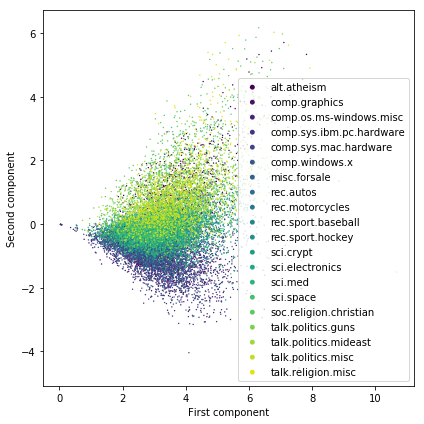

In [92]:
x_unit_var_reduced = scale(x_reduced, with_mean=False)
y_pred = kmean_wrapper(x_unit_var_reduced, y, n_clusters=20, if_reassign=False)
evaluate_results(y, y_pred)

plot_color_coding(x_unit_var_reduced, y, labels, '5-2d-unit-var', figsize=(6, 6))

-----------------Running with log transform-------------------
Homogeneity: 0.318
Completeness: 0.358
V-measure: 0.337
Adjusted Rand-Index: 0.127
Adjusted Mutual info score: 0.315


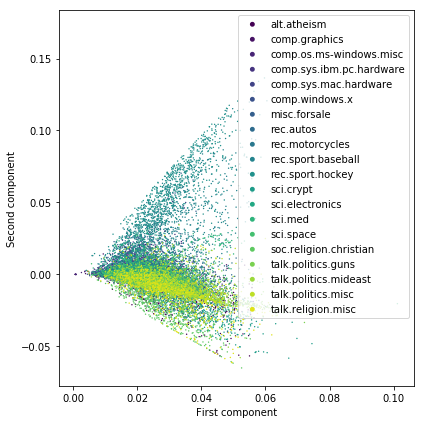

In [110]:
nmf = NMF(n_components=10, random_state=42)
x_reduced = nmf.fit_transform(x_tfidf)
x_log_reduced = np.log1p(x_reduced)

y_pred = kmean_wrapper(x_log_reduced, y, n_clusters=20, if_reassign=False)
evaluate_results(y, y_pred, 'with log transform')

plot_color_coding(x_log_reduced, y, labels, '5-2d-log-transform', figsize=(6, 6))

-----------------Running log transform -> normalize-------------------
Homogeneity: 0.303
Completeness: 0.338
V-measure: 0.320
Adjusted Rand-Index: 0.120
Adjusted Mutual info score: 0.301
-----------------Running normalize -> log transform-------------------
Homogeneity: 0.357
Completeness: 0.369
V-measure: 0.363
Adjusted Rand-Index: 0.175
Adjusted Mutual info score: 0.355


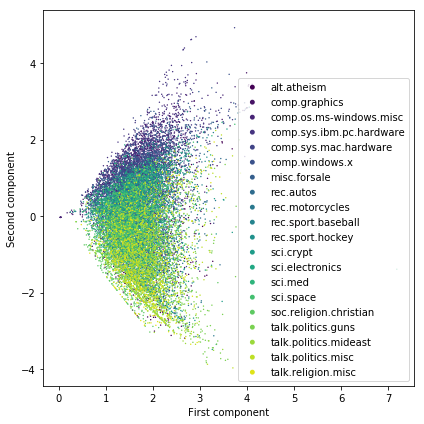

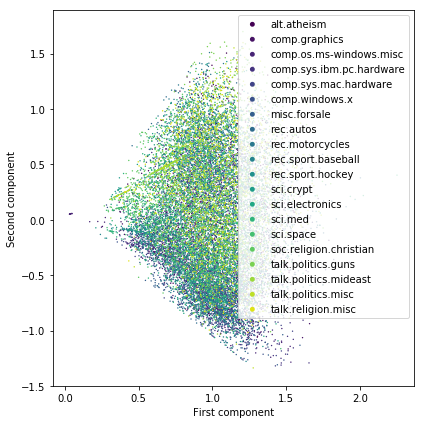

In [114]:
x_log_reduced = np.log1p(x_reduced)
x_log_unit_var_reduced = scale(x_log_reduced, with_mean=False)
y_pred = kmean_wrapper(x_log_unit_var_reduced, y, n_clusters=20, if_reassign=False)
evaluate_results(y, y_pred, 'log transform -> normalize')

x_unit_var_reduced = scale(x_reduced, with_mean=False)
x_unit_var_log_reduced = np.log1p(x_unit_var_reduced)
y_pred = kmean_wrapper(x_unit_var_log_reduced, y, n_clusters=20, if_reassign=False)
evaluate_results(y, y_pred, 'normalize -> log transform')

plot_color_coding(x_log_unit_var_reduced, y, labels, '5-2d-log-unit-var', figsize=(6, 6))
plot_color_coding(x_unit_var_log_reduced, y, labels, '5-2d-unit-var-log', figsize=(6, 6))

## Extra

In [2]:
x, y = load_data()
x_tfidf = TFxIDF(x)

print("trn shape", x_tfidf.shape)

trn shape (7882, 27768)


In [9]:
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, DBSCAN

In [16]:
sp_cluster = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="rbf")
sp_cluster.fit(x_tfidf)
evaluate_results(y, sp_cluster.labels_)

-----------------Running default-------------------
Homogeneity: 0.535
Completeness: 0.553
V-measure: 0.544
Adjusted Rand-Index: 0.588
Adjusted Mutual info score: 0.535
